Вопросы и гипотезы:
1) Из какой страны было взято наибольшее число игроков?
2) Какое значение параметра "Points per Game Played" у игроков входящих в 5% лучших? (считаем, что игроки с большим P/GP лучше, чем с меньшим)
3) Есть ли связь между ростом игрока и средним количеством забитых им голов за игру? (предполагаю, что нет)
4) Правда ли, что люди с большим количеством забитых победных голов реже помогают забивать?
5) Можно ли выразить количество забитых голов с помощью линейной функции от количества забитых победных голов?
6) Правда ли, что средний рост игроков, родившихся до 1980ого года меньше, чем тех, кто родился позже?
7) Правда ли, что значение параметра "Points per Game Played" подчиняется какому-то нормальному распределению?

In [367]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка датасета

Для начала объединим таблицы Bio info (0-78) и Summury (0-78), а также удалим одинаковые строки. В итоге должно остаться 7735 строк

In [368]:
def get_bio_info_table():
    list_of_bio_info = []
    for i in range(79):
        list_of_bio_info.append(pd.read_excel("nhl/bio/Bio info (" + str(i) + ").xlsx"))
    bio_info = pd.concat(list_of_bio_info, axis=0)
    bio_info = bio_info.drop_duplicates()
    return bio_info
bio_info = get_bio_info_table()
bio_info

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,Draft Yr,Round,Overall,1st Season,HOF,GP,G,A,P
0,Jack Laviolette,R,D,1879-07-27,Belleville,ON,CAN,CAN,71,170,--,--,--,19171918,Y,18,2,1,3
1,Ken Thompson,L,L,1881-05-29,Oakengates,--,GBR,GBR,70,160,--,--,--,19171918,N,1,0,0,0
2,Joe Hall,R,D,1882-05-03,Staffordshire,--,GBR,GBR,70,175,--,--,--,19171918,Y,37,15,9,24
3,Didier Pitre,R,R,1883-09-01,Valleyfield,QC,CAN,CAN,71,185,--,--,--,19171918,Y,127,64,35,99
4,Lester Patrick,L,D,1883-12-30,Drummondville,QC,CAN,CAN,73,180,--,--,--,19261927,Y,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Bradly Nadeau,R,L,2005-05-05,St-Francois de Madaw,NB,CAN,CAN,71,172,2023,1,30,20232024,N,1,0,0,0
31,Zach Benson,L,L,2005-05-12,Chilliwack,BC,CAN,CAN,70,170,2023,1,13,20232024,N,112,19,27,46
32,Connor Bedard,R,C,2005-07-17,North Vancouver,BC,CAN,CAN,70,185,2023,1,1,20232024,N,115,35,67,102
33,Macklin Celebrini,L,C,2006-06-13,North Vancouver,BC,CAN,CAN,72,190,2024,1,1,20242025,N,38,14,20,34


In [369]:
def get_summary_table():
    list_of_summary = []
    for i in range(79):
        list_of_summary.append(pd.read_excel("nhl/summary/Summary (" + str(i) + ").xlsx"))
    summary = pd.concat(list_of_summary, axis=0)
    summary = summary.drop_duplicates()
    return summary
summary = get_summary_table()
summary

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Antti Aalto,L,C,151,11,17,28,-25,52,0.19,...,3,4,0,0,0,1,182,6,11:03,49.7
1,Reg Abbott,L,C,3,0,0,0,0,0,0.00,...,0,0,0,0,0,0,--,--,--,--
2,Spencer Abbott,R,L,2,0,0,0,-2,0,0.00,...,0,0,0,0,0,0,3,0,6:55,--
3,Justin Abdelkader,L,L,739,106,146,252,-56,608,0.34,...,25,48,1,3,3,15,"1,238",8.6,14:54,50.5
4,Clarence Abel,L,D,333,20,18,38,0,365,0.11,...,0,0,1,1,1,5,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Jason Zucker,L,L,743,212,193,405,-3,386,0.55,...,43,88,3,5,3,32,"1,683",12.6,15:30,32
31,Mike Zuke,R,C,455,86,196,282,-42,220,0.62,...,21,105,3,7,0,6,754,11.4,--,--
32,Rudy Zunich,L,D,2,0,0,0,0,2,0.00,...,0,0,0,0,0,0,--,--,--,--
33,Valentin Zykov,R,L,55,7,10,17,-2,10,0.31,...,1,3,0,0,0,1,69,10.1,11:07,18.2


In [370]:
print(bio_info.columns)
print(summary.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P'],
      dtype='object')
Index(['Player', 'S/C', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'P/GP',
       'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%',
       'TOI/GP', 'FOW%'],
      dtype='object')


Теперь объединим таблицы в одну

In [1]:
player_info = pd.merge(left=bio_info, right=summary, left_on=['Player', 'S/C', 'Pos', 'GP', 'A', 'P', 'G'], right_on=['Player', 'S/C', 'Pos', 'GP', 'A', 'P', 'G'])
player_info

NameError: name 'pd' is not defined

In [372]:
print(player_info.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P', '+/-', 'PIM', 'P/GP', 'EVG', 'EVP', 'PPG', 'PPP', 'SHG',
       'SHP', 'OTG', 'GWG', 'S', 'S%', 'TOI/GP', 'FOW%'],
      dtype='object')


Обрабатываем выбросы:

In [373]:
player_info['A'][player_info['A'].apply(lambda x: not str(x).isdigit())]

938     1,049
1832    1,040
2710    1,169
2717    1,193
2721    1,963
2771    1,135
2886    1,079
2933    1,249
3192    1,063
3239    1,033
3716    1,016
4008    1,155
4886    1,109
5854    1,042
Name: A, dtype: object

In [374]:
player_info['P'][player_info['P'].apply(lambda x: not str(x).isdigit())]

938     1,850
1045    1,219
1051    1,281
1159    1,369
1179    1,229
        ...  
5901    1,096
5999    1,314
6131    1,168
6222    1,082
7056    1,047
Name: P, Length: 99, dtype: object

In [375]:
player_info['G'][player_info['G'].apply(lambda x: not str(x).isdigit())]

Series([], Name: G, dtype: int64)

In [376]:
player_info['GP'][player_info['GP'].apply(lambda x: not str(x).isdigit())]

833     1,113
851     1,068
876     1,244
912     1,316
916     1,248
        ...  
6273    1,116
6293    1,015
6327    1,029
6376    1,009
6448    1,048
Name: GP, Length: 401, dtype: object

In [377]:
print(sorted(player_info['Ht'])[:5])
print(sorted(player_info['Ht'])[-5:])

[0, 0, 0, 0, 0]
[80, 80, 80, 81, 81]


In [378]:
def convert_to_int(x):
    if str(x).isdigit():
        return int(x)
    else:
        return int(str(x)[0] + str(x)[2:])
player_info['A'] = player_info['A'].apply(convert_to_int)
player_info['P'] = player_info['P'].apply(convert_to_int)
player_info['GP'] = player_info['GP'].apply(convert_to_int)
player_info['Ht'] = player_info['Ht'].apply(lambda x: x * 3)
player_info['DOB'] = pd.to_datetime(player_info['DOB'], format='%Y-%m-%d')
player_info['1st Season'] = pd.to_datetime(player_info['1st Season'].apply(lambda x: str(x)[:4]), format='%Y')

In [379]:
player_info = player_info.drop(columns=['+/-', 'EVG', 'PPP', 'S%', 'EVP', 'TOI/GP', 'PPG', 'FOW%'])

In [380]:
print(player_info.columns)

Index(['Player', 'S/C', 'Pos', 'DOB', 'Birth City', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF', 'GP',
       'G', 'A', 'P', 'PIM', 'P/GP', 'SHG', 'SHP', 'OTG', 'GWG', 'S'],
      dtype='object')


In [381]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player      7735 non-null   object        
 1   S/C         7735 non-null   object        
 2   Pos         7735 non-null   object        
 3   DOB         7735 non-null   datetime64[ns]
 4   Birth City  7735 non-null   object        
 5   S/P         7735 non-null   object        
 6   Ctry        7735 non-null   object        
 7   Ntnlty      7735 non-null   object        
 8   Ht          7735 non-null   int64         
 9   Wt          7735 non-null   object        
 10  Draft Yr    7735 non-null   object        
 11  Round       7735 non-null   object        
 12  Overall     7735 non-null   object        
 13  1st Season  7735 non-null   datetime64[ns]
 14  HOF         7735 non-null   object        
 15  GP          7735 non-null   int64         
 16  G           7735 non-nul

In [382]:
player_info.describe()

,DOB,Ht,1st Season,GP,G,A,P,P/GP,OTG,GWG
count,7735,7735.000000,7735,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,1966-01-09 07:01:28.894634784,216.501099,1987-08-26 02:01:34.014221056,281.689981,49.775048,81.076147,130.851196,0.299824,0.638526,7.135488
min,1879-07-27 00:00:00,0.000000,1917-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1952-09-25 12:00:00,213.000000,1974-01-01 00:00:00,20.000000,1.000000,2.000000,3.000000,0.130000,0.000000,0.000000
50%,1970-11-03 00:00:00,216.000000,1993-01-01 00:00:00,125.000000,10.000000,18.000000,30.000000,0.250000,0.000000,1.000000
75%,1987-03-04 12:00:00,222.000000,2009-01-01 00:00:00,471.000000,54.000000,99.000000,158.500000,0.430000,0.000000,7.000000
max,2006-08-21 00:00:00,243.000000,2024-01-01 00:00:00,1779.000000,894.000000,1963.000000,2857.000000,1.920000,27.000000,135.000000
std,NaN,10.455168,NaN,337.615176,91.535094,139.825530,225.952308,0.239963,1.851806,13.739420


In [383]:
player_info.sample(10)

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,...,G,A,P,PIM,P/GP,SHG,SHP,OTG,GWG,S
5039,Chris Durno,L,L,1980-10-31,Scarborough,ON,CAN,CAN,228,223,...,4,4,8,47,0.19,0,0,0,0,30
7700,Maveric Lamoureux,R,D,2004-01-13,Laval,QC,CAN,CAN,234,196,...,1,2,3,42,0.20,0,0,0,0,17
2828,Randy Turnbull,R,D,1962-02-07,Bentley,AB,CAN,CAN,216,185,...,0,0,0,2,0.00,0,0,0,0,0
5209,Tomas Mojzis,L,D,1982-05-02,Kolin,--,CZE,CZE,219,195,...,1,2,3,14,0.18,0,0,0,0,16
1594,Ed Kea,L,D,1948-01-19,Weesp,--,NLD,NLD,225,200,...,30,145,175,508,0.30,0,4,0,2,696
3488,Shaun Van Allen,L,C,1967-08-29,Calgary,AB,CAN,CAN,219,206,...,84,185,269,481,0.34,13,21,0,17,811
7526,Kaedan Korczak,R,D,2001-01-29,Yorkton,SK,CAN,CAN,225,203,...,1,13,14,8,0.26,0,0,0,0,61
1146,Dick Bouchard,R,R,1934-12-02,Letellier,MB,CAN,CAN,204,155,...,0,0,0,0,0.00,0,0,0,0,--
3788,Joby Messier,R,D,1970-03-02,Regina,SK,CAN,CAN,219,207,...,0,4,4,24,0.16,0,0,0,0,22
5977,Carl Hagelin,L,L,1988-08-23,Sodertalje,--,SWE,SWE,216,183,...,110,186,296,293,0.42,6,14,1,27,"1,429"


# Ответы на вопросы и проверка гипотез:

1) Из какой страны было взято наибольшее число игроков?

In [384]:
print(player_info.groupby('Ctry')['Ctry'].agg('count').sort_values(ascending=False)[:5])

Ctry
CAN    4941
USA    1316
SWE     379
RUS     276
CZE     237
Name: Ctry, dtype: int64


Из чего можно сделать вывод: больше всего игроков было взято из Канады, из США было взято в 4 раза меньше

2) Какое значение параметра "Points per Game Played" у игроков входящих в 5% лучших? (считаем, что игроки с большим P/GP лучше, чем с меньшим)

In [385]:
int(len(player_info) * 0.95)

7348

In [386]:
player_info.sort_values(by='P/GP')[int(len(player_info) * 0.95):].drop(columns=\
        ['S/C', 'Pos', 'S/P', 'Ctry', 'Ntnlty',
       'Ht', 'Wt', 'Draft Yr', 'Round', 'Overall', '1st Season', 'HOF',
       'G', 'A', 'P', 'PIM', 'SHG', 'SHP',
       'OTG', 'GWG', 'S'])

,Player,DOB,Birth City,GP,P/GP
3238,Cliff Ronning,1965-10-01,Burnaby,1137,0.76
1668,Gregg Sheppard,1949-04-23,North Battleford,657,0.76
7269,Brandon Hagel,1998-08-27,Saskatoon,339,0.76
5454,Rick Nash,1984-06-16,Brampton,1060,0.76
3844,Tony Amonte,1970-08-02,Hingham,1174,0.77
...,...,...,...,...,...
2323,Mike Bossy,1957-01-22,Montréal,752,1.50
7056,Connor McDavid,1997-01-13,Richmond Hill,688,1.52
19,Newsy Lalonde,1888-10-31,Cornwall,99,1.69
3239,Mario Lemieux,1965-10-05,Montréal,915,1.88


Ответ: 0.76

3) Есть ли связь между ростом игрока и среднем количеством забитых им голов за игру? (предполагаю, что нет)

4) Правда ли, что люди с большим количеством забитых победных голов реже помогают забивать?

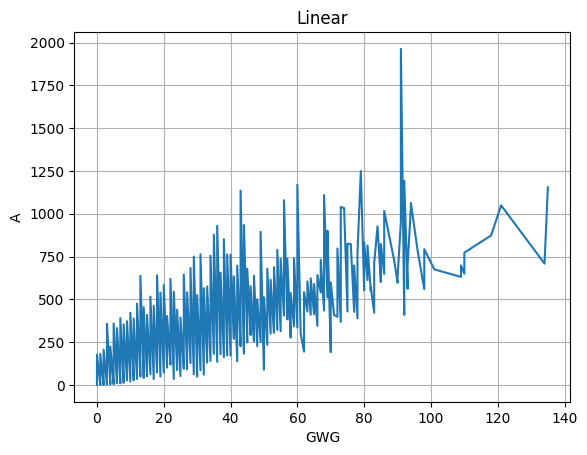

In [387]:
plt.title('Linear')
plt.xlabel('GWG')
plt.ylabel('A')
plt.grid()
l1, l2 = zip(*sorted(zip(list(player_info['GWG']), list(player_info['A']))))
plt.plot(l1, l2)

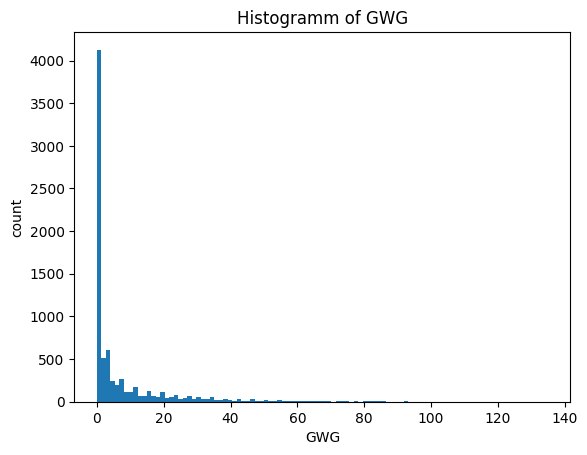

In [388]:
plt.title('Histogramm of GWG')
plt.xlabel('GWG')
plt.ylabel('count')
plt.hist(player_info['GWG'], bins=100)
plt.show()

In [389]:
df1 = pd.DataFrame()
df1['GWG'] = player_info['GWG']
df1['A'] = player_info['A']
df1 = df1.groupby('GWG').agg('mean')
df1

,A
GWG,
0,5.116625
1,20.456257
2,36.405882
3,54.478632
4,64.118577
...,...
110,711.500000
118,873.000000
121,1049.000000


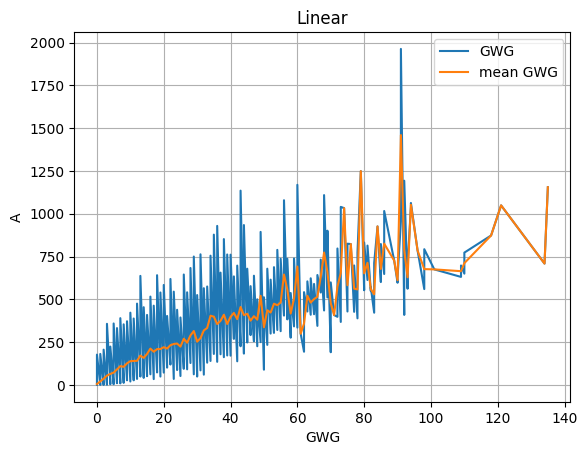

In [390]:
plt.title('Linear')
plt.xlabel('GWG')
plt.ylabel('A')
plt.grid()
l1, l2 = zip(*sorted(zip(list(player_info['GWG']), list(player_info['A']))))
l3, l4 = zip(*sorted(zip(list(df1.index), list(df1['A']))))
plt.plot(l1, l2, l3, l4)
plt.legend(['GWG', 'mean GWG'])

5) Можно ли выразить количество забитых голов с помощью линейной функции от количества забитых победных голов?

6) Правда ли, что средний рост игроков, родившихся до 1980ого года меньше, чем тех, кто родился позже?

In [391]:
print(player_info[player_info['DOB'] < pd.to_datetime('1980-01-01')]['Ht'].mean())
print(player_info[player_info['DOB'] >= pd.to_datetime('1980-01-01')]['Ht'].mean())

214.87081048141377
219.35526315789474


In [392]:
df2 = pd.DataFrame()
df2['DOB'] = player_info['DOB']
df2['Ht'] = player_info['Ht']
df2

,DOB,Ht
0,1879-07-27,213
1,1881-05-29,210
2,1882-05-03,210
3,1883-09-01,213
4,1883-12-30,219
...,...,...
7730,2005-05-05,213
7731,2005-05-12,210
7732,2005-07-17,210
7733,2006-06-13,216


In [393]:
# plt.title('Linear')
# plt.xlabel('DOB')
# plt.ylabel('mean Height')
# plt.grid()
# l1, l2 = zip(*sorted(zip(list(df2.index), list(df2['Ht']))))
# plt.plot(l1, l2)

In [394]:
print(df2[df2['Ht'] < 120])

            DOB  Ht
37   1891-06-01   0
65   1893-08-04   0
78   1894-11-04   0
115  1897-07-22   0
1542 1947-02-07   0
2092 1954-07-23   0
2151 1955-03-21   0
2169 1955-05-03   0
2898 1962-10-06   0
3557 1968-03-22   0


Это скорее всего выбросы, уберём их

In [395]:
df2 = df2[df2['Ht'] >= 120]

In [396]:
# plt.title('Linear')
# plt.xlabel('DOB')
# plt.ylabel('mean Height')
# plt.grid()
# l1, l2 = zip(*sorted(zip(list(df2.index), list(df2['Ht']))))
# plt.plot(l1, l2)

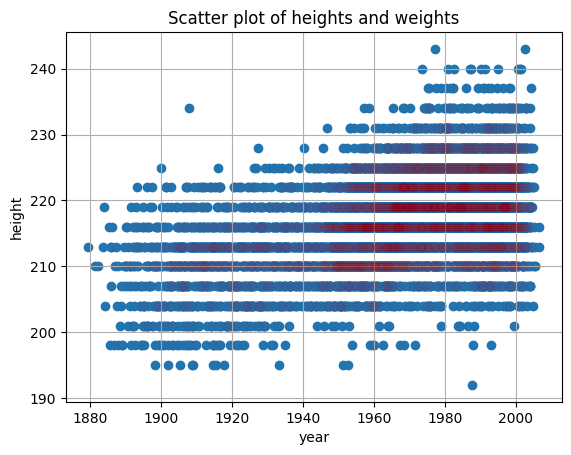

In [397]:
plt.title('Scatter plot of heights and weights')
plt.xlabel('year')
plt.ylabel('height')
plt.grid()
plt.plot(df2['DOB'], df2['Ht'], 'ro', alpha=0.01)
plt.scatter(df2['DOB'], df2['Ht'])
plt.show()

In [398]:
print(df2[df2['DOB'] < pd.to_datetime('1980-01-01')]['Ht'].mean())
print(df2[df2['DOB'] >= pd.to_datetime('1980-01-01')]['Ht'].mean())

215.3081620191329
219.35526315789474


In [399]:
def get_linear_reg(x, y):
    n = len(x)
    y1 = y.sum()
    x1 = x.sum()
    x2 = (x**2).sum()
    xy = (x*y).sum()

    b = (x1 * xy - y1 * x2) / (x1 * x1 - n * x2)
    a = (y1 - b * n) / x1
    return (a, b)
# pd.Timestamp().
df2['DOB'] = df2.index
df2['DOB'] = df2['DOB'].apply(lambda x: x.)
a, b = get_linear_reg(df2['DOB'], df2['Ht'])

SyntaxError: invalid syntax (3987155114.py, line 13)

7) Правда ли, что значение параметра "Points per Game Played" подчиняется какому-то нормальному распределению?

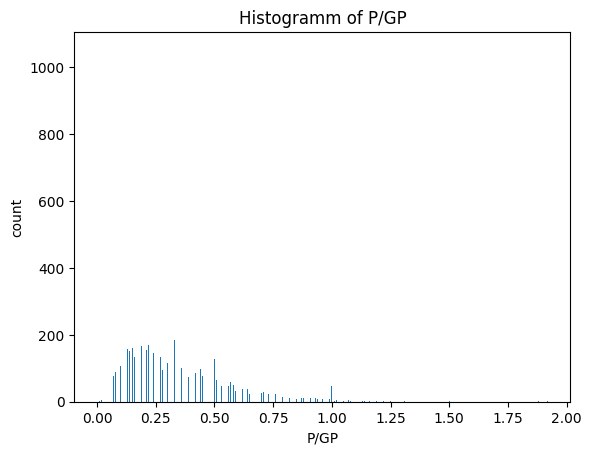

In [ ]:
plt.title('Histogramm of P/GP')
plt.xlabel('P/GP')
plt.ylabel('count')
plt.hist(player_info['P/GP'], bins=1000)
plt.show()

In [ ]:
PGP_mean = player_info['P/GP'].mean()
PGP_mean

0.29982417582417586

In [ ]:
PGP_stdev = (player_info['P/GP'].apply(lambda x: (x - PGP_mean)**2).sum()/(len(player_info['P/GP']) - 1))**0.5
PGP_stdev

0.23996275917835755